In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Country-data.csv")
df_1 = pd.read_csv("data-dictionary.csv")

In [3]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df_1.isnull().sum()

Column Name    0
Description    0
dtype: int64

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df_1.describe()

,Column Name,Description
count,10,10
unique,10,10
top,country,Name of the country
freq,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  10 non-null     object
 1   Description  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [9]:
df.duplicated().sum()

0

In [10]:
df_1.duplicated().sum()

0

In [11]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [12]:
df_1.columns

Index(['Column Name', 'Description'], dtype='object')

In [13]:
print('country:', len(df['country'].unique()))
print('Child_death:', len(df['child_mort'].unique()))
print('Exports:', len(df['exports'].unique()))
print('Health:', len(df['health'].unique()))
print('Imports:', len(df['imports'].unique()))
print('Income:', len(df['income'].unique()))
print('Inflation:', len(df['inflation'].unique()))
print('Life_expectancy:', len(df['life_expec'].unique()))
print('Fertility:', len(df['total_fer'].unique()))
print('GDP:', len(df['gdpp'].unique()))

country: 167
Child_death: 139
Exports: 147
Health: 147
Imports: 151
Income: 156
Inflation: 156
Life_expectancy: 127
Fertility: 138
GDP: 157


In [14]:
df.rename(columns = {'child_mort':'Child_death', 'exports':'Exports','health':'Health','imports':'Imports','income':'Income','inflation':'Inflation','life_expec':'Life_expectancy','total_fer':'Fertility','gdpp':'GDP'}, inplace = True)

In [15]:
del df["country"]

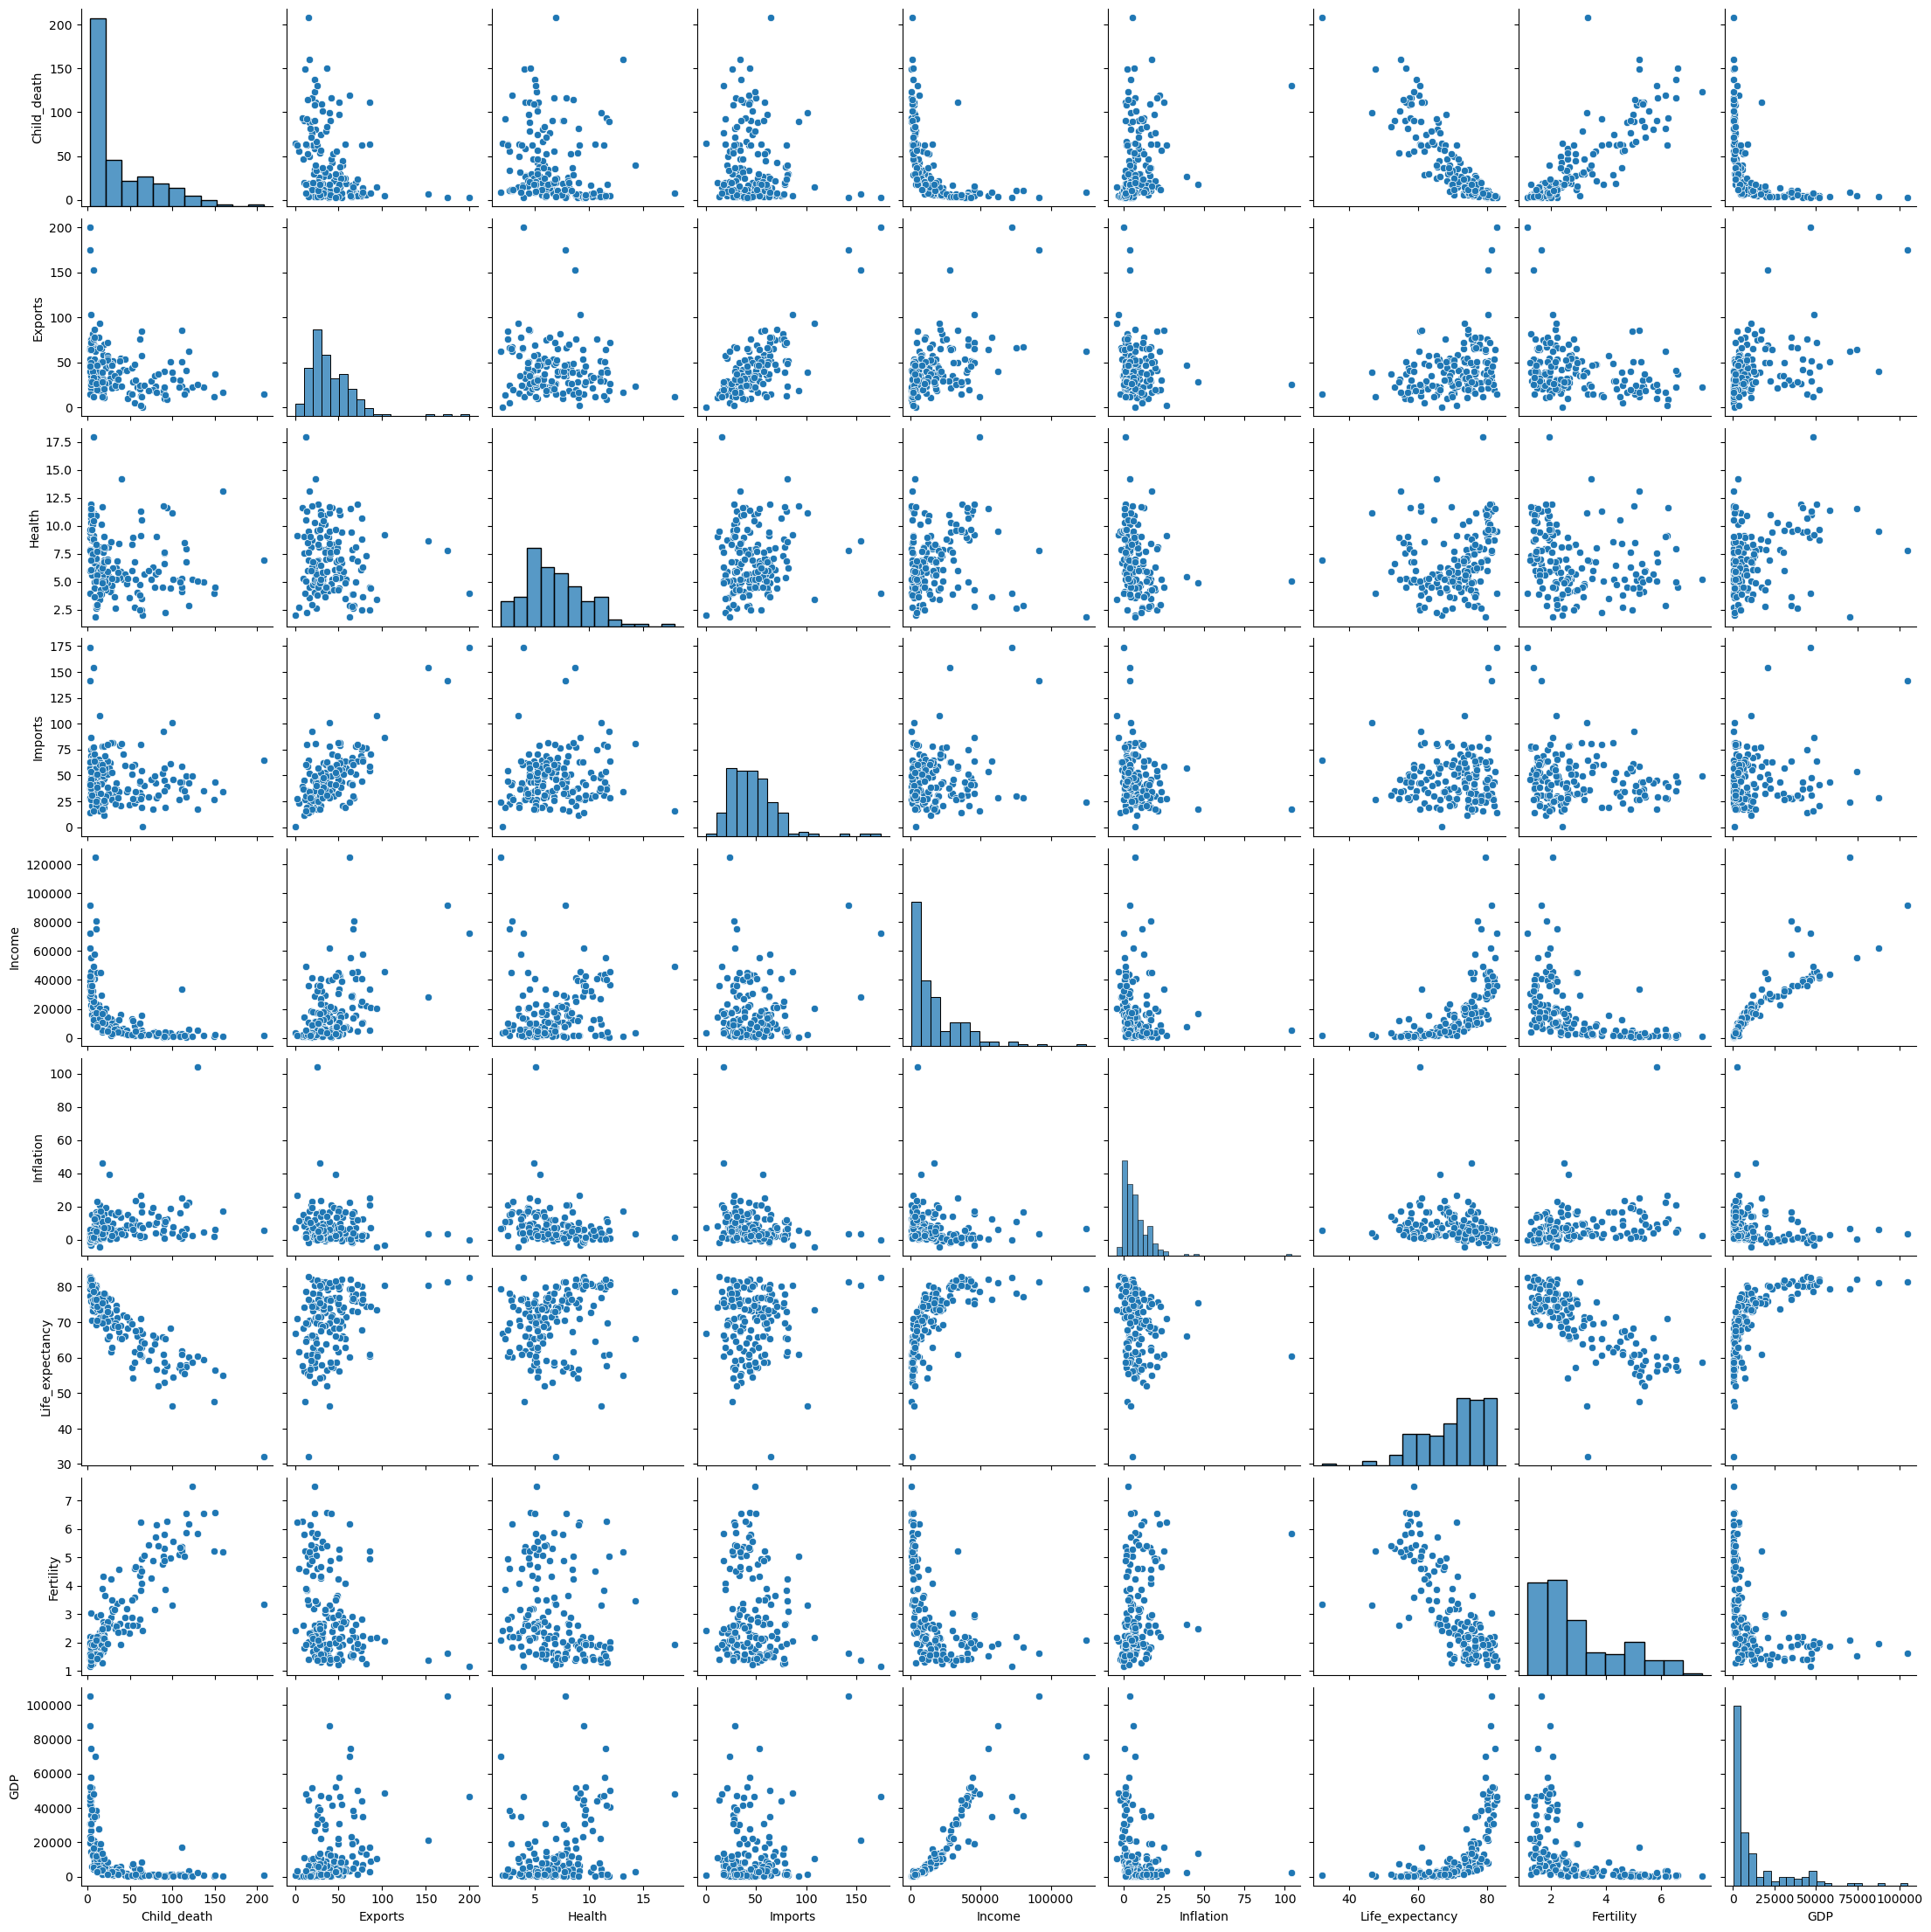

In [16]:
sns.pairplot(df)

In [22]:
scale = StandardScaler()
scaled = scale.fit_transform(df)

In [21]:
df_scaled = pd.DataFrame(scaled,columns=df.columns)
df_scaled.head()

,Child_death,Exports,Health,Imports,Income,Inflation,Life_expectancy,Fertility,GDP
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [23]:
from sklearn.cluster import KMeans

In [27]:
a = []
x = range(1,10)
for i in x:
    k = KMeans(n_clusters=i)
    k.fit(df)
    # k.fit(df)
    a.append(k.inertia_)
    
plt.plot(x,a,marker='*')
plt.ylabel('WCSS')
plt.xlabel('No. of clusters')
plt.title('Elbow')

AttributeError: 'NoneType' object has no attribute 'split'

In [30]:
k= KMeans(n_clusters = 2)
k.fit(df_scaled)


KMeans(n_clusters=2)

In [31]:
pd.Series(k.labels_).value_counts()

0    99
1    68
dtype: int64

In [32]:
from sklearn import metrics

metrics.silhouette_score(df_scaled,k.labels_)

0.28735668921406704

In [33]:
cluster_labels = k.fit_predict(df_scaled)

In [34]:
pred = k.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['Clusters'] = pred
kmeans_df.head(10)

,Child_death,Exports,Health,Imports,Income,Inflation,Life_expectancy,Fertility,GDP,Clusters
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [35]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k )
    km.fit(df[['GDP','Child_death']])
    sse.append(km.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'